<a href="https://colab.research.google.com/github/Shivani622/BMI/blob/main/Swift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
glance_views = pd.read_csv('/content/Glance_Views.csv')
sales_data = pd.read_csv('/content/Sales_Data.csv')

In [73]:
print("Glance Views Data:")
print(glance_views.head())
print("\nSales Data:")
print(sales_data.head())

Glance Views Data:
   Unnamed: 0    SKU_NAME   FEED_DATE  VIEWS  UNITS
0           0  B1212:PZ:V  2019-05-01  455.0   16.0
1           1  B1212:PZ:V  2019-05-02  478.0   12.0
2           2  B1212:PZ:V  2019-05-03  681.0   42.0
3           3  B1212:PZ:V  2019-05-04  662.0   70.0
4           4  B1212:PZ:V  2019-05-05  568.0   33.0

Sales Data:
   Unnamed: 0    SKU_NAME   FEED_DATE     CATEGORY SUB_CATEGORY  \
0           0  B12020KBUI  2019-05-18  1000 Inputs    1002 Mice   
1           1  B12020KBUI  2019-05-19  1000 Inputs    1002 Mice   
2           2  B12020KBUI  2019-05-22  1000 Inputs    1002 Mice   
3           3  B12020KBUI  2019-05-23  1000 Inputs    1002 Mice   
4           4  B12020KBUI  2019-05-27  1000 Inputs    1002 Mice   

   ORDERED_REVENUE  ORDERED_UNITS  REP_OOS  
0              0.0            0.0      0.0  
1              0.0            0.0      0.0  
2              0.0            0.0      0.0  
3              0.0            0.0      0.0  
4              0.0          

In [74]:
# Inspect the first few rows of each dataset
print("Glance Views Data:")
print(glance_views.head())
print("\nSales Data:")
print(sales_data.head())

# Check for missing values
print("\nMissing Values in Glance Views Data:")
print(glance_views.isnull().sum())

print("\nMissing Values in Sales Data:")
print(sales_data.isnull().sum())

Glance Views Data:
   Unnamed: 0    SKU_NAME   FEED_DATE  VIEWS  UNITS
0           0  B1212:PZ:V  2019-05-01  455.0   16.0
1           1  B1212:PZ:V  2019-05-02  478.0   12.0
2           2  B1212:PZ:V  2019-05-03  681.0   42.0
3           3  B1212:PZ:V  2019-05-04  662.0   70.0
4           4  B1212:PZ:V  2019-05-05  568.0   33.0

Sales Data:
   Unnamed: 0    SKU_NAME   FEED_DATE     CATEGORY SUB_CATEGORY  \
0           0  B12020KBUI  2019-05-18  1000 Inputs    1002 Mice   
1           1  B12020KBUI  2019-05-19  1000 Inputs    1002 Mice   
2           2  B12020KBUI  2019-05-22  1000 Inputs    1002 Mice   
3           3  B12020KBUI  2019-05-23  1000 Inputs    1002 Mice   
4           4  B12020KBUI  2019-05-27  1000 Inputs    1002 Mice   

   ORDERED_REVENUE  ORDERED_UNITS  REP_OOS  
0              0.0            0.0      0.0  
1              0.0            0.0      0.0  
2              0.0            0.0      0.0  
3              0.0            0.0      0.0  
4              0.0          

**1. Identify the most expensive SKU, on average, over the entire time period.**

In [75]:
sales_data['PRICE_PER_UNIT'] = sales_data['ORDERED_REVENUE'] / sales_data['ORDERED_UNITS']

In [76]:
sales_data_clean = sales_data[sales_data['ORDERED_UNITS'] > 0]

In [77]:
avg_price_per_sku = sales_data_clean.groupby('SKU_NAME')['PRICE_PER_UNIT'].mean()

In [78]:
most_expensive_sku = avg_price_per_sku.idxmax()
highest_avg_price = avg_price_per_sku.max()
print(f"\nMost expensive SKU: {most_expensive_sku}, Average Price: {highest_avg_price}")


Most expensive SKU: C03CBL[721, Average Price: 1151.8587273143523


<ipython-input-79-c00daa553d95>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_expensive_skus.values, y=top_10_expensive_skus.index, palette="Blues_r")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarnin

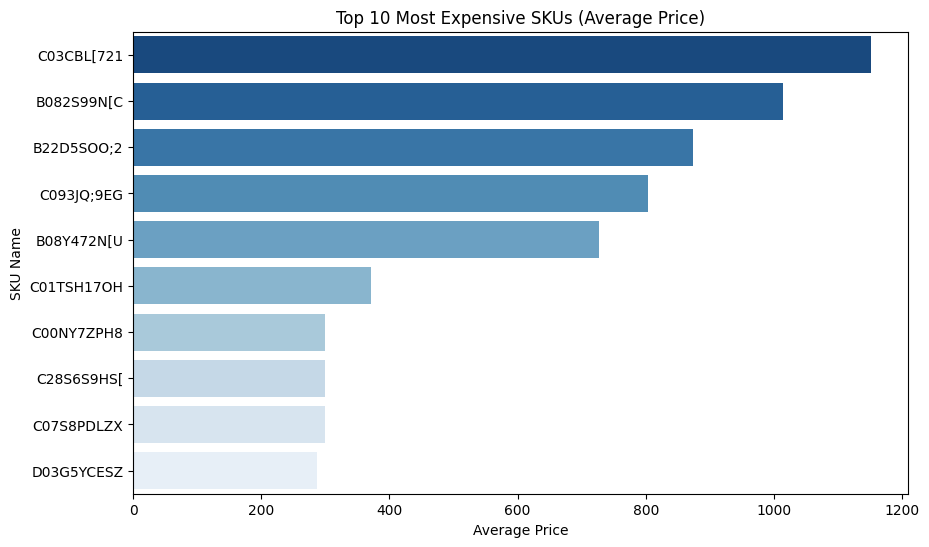

In [79]:
top_10_expensive_skus = avg_price_per_sku.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_expensive_skus.values, y=top_10_expensive_skus.index, palette="Blues_r")
plt.title('Top 10 Most Expensive SKUs (Average Price)')
plt.xlabel('Average Price')
plt.ylabel('SKU Name')
plt.show()

**2. What % of SKUs have generated some revenue in this time period?**

In [80]:
total_skus = sales_data['SKU_NAME'].nunique()
skus_with_revenue = sales_data[sales_data['ORDERED_REVENUE'] > 0]['SKU_NAME'].nunique()

In [81]:
percent_skus_with_revenue = (skus_with_revenue / total_skus) * 100

print(f"\nPercentage of SKUs generating revenue: {percent_skus_with_revenue:.2f}%")


Percentage of SKUs generating revenue: 78.71%


In [82]:
sales_after_july = sales_data[sales_data['FEED_DATE'] > '2019-07-31']
skus_no_sales_after_july = set(sales_data['SKU_NAME']) - set(sales_after_july['SKU_NAME'])

print(f"SKUs that stopped selling after July: {skus_no_sales_after_july}")

SKUs that stopped selling after July: {'B12020KBUI', 'D237YHQCNZ', 'C22LA\\IV5D', 'C01JSHF992', 'D21MYLC9K6', 'D223J6HIOC', 'D01O0D2T97', 'B004RU\\O1U', 'D22KYRHY06', 'D01CLVJV9A', 'D235O9[O\\M', 'C28S6S9HS[', 'C02;FKVI8G', 'B13I6J4KZO', 'C013KD0YM:', 'C17NEDU7P[', 'B222RN877C', 'C12V8HJ19W', 'B02RJH28AY', 'C1027E31J0', 'D10AEBZ98B', 'D21HFX6:SJ', 'C0285E5797', 'C10DCVDEKQ', 'B12NR3KOL6', 'B123P7CEQM', 'B22[BSDHRC', 'C07S8PDLZX', 'C01G1DSTLM', 'C028:8XTUS', 'D03LX599KF', 'D27IO46C5P', 'C10N5I1QJI', 'B09FIZS5TZ', 'C29LCOGDHZ', 'D115J4FH48', 'C0038K4UWZ', 'B10LJIXFL0', 'C20DN1YJNT', 'C02228YPPT', 'D024M2YU:7', 'C12GZK3L49', 'B17EGTWTMH', 'B21O5ZKQNV', 'D01K[M7T3R', 'D225JQ6249', 'C20FS9V2V2', 'C01WVM5S0S', 'C11P43JR78', 'C214SL86Q[', 'D22KAZIU6A', 'D1000D20S:', 'D11DR8NA8W'}


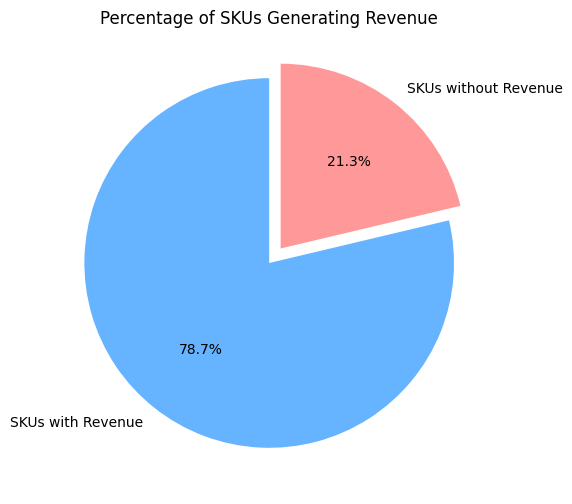

In [83]:
plt.figure(figsize=(6, 6))
labels = ['SKUs with Revenue', 'SKUs without Revenue']
sizes = [percent_skus_with_revenue, 100 - percent_skus_with_revenue]
colors = ['#66b3ff', '#ff9999']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=(0, 0.1))
plt.title('Percentage of SKUs Generating Revenue')
plt.show()

**3. Identify the dates of a sale event.**

In [84]:
# sales_data_clean['DATE'] = pd.to_datetime(sales_data_clean['FEED_DATE'])

sales_data_clean = sales_data[sales_data['ORDERED_UNITS'] > 0].copy()
sales_data_clean['DATE'] = pd.to_datetime(sales_data_clean['FEED_DATE'])

In [85]:
sales_trends = sales_data_clean.groupby('DATE').agg({
    'ORDERED_UNITS': 'sum',
    'PRICE_PER_UNIT': 'mean'
}).reset_index()

In [86]:
spike_threshold_units = sales_trends['ORDERED_UNITS'].mean() + 2 * sales_trends['ORDERED_UNITS'].std()
price_drop_threshold = sales_trends['PRICE_PER_UNIT'].mean() - 2 * sales_trends['PRICE_PER_UNIT'].std()

sale_event_dates = sales_trends[
    (sales_trends['ORDERED_UNITS'] > spike_threshold_units) &
    (sales_trends['PRICE_PER_UNIT'] < price_drop_threshold)
]['DATE']

print(f"\nSale event dates: {sale_event_dates.tolist()}")


Sale event dates: []


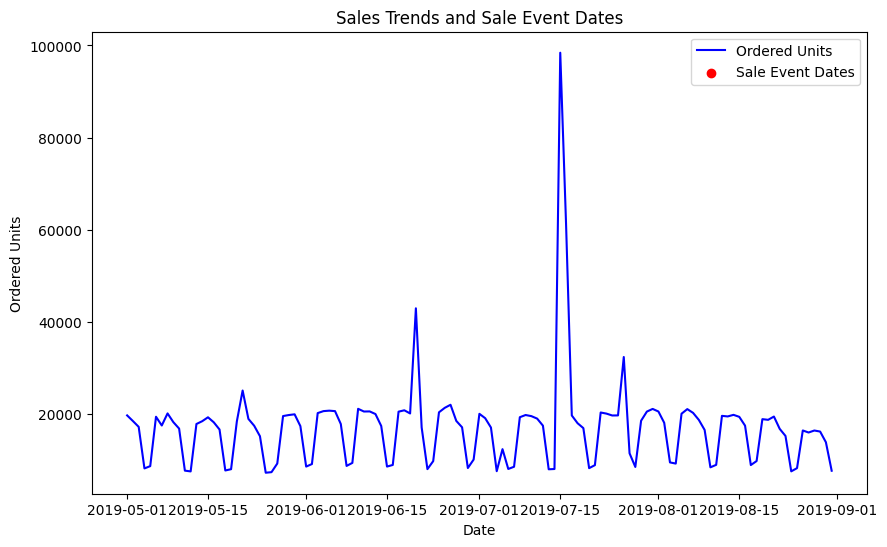

In [87]:
plt.figure(figsize=(10, 6))
plt.plot(sales_trends['DATE'], sales_trends['ORDERED_UNITS'], label='Ordered Units', color='blue')
plt.scatter(sale_event_dates, sales_trends[sales_trends['DATE'].isin(sale_event_dates)]['ORDERED_UNITS'], color='red', label='Sale Event Dates', zorder=5)
plt.xlabel('Date')
plt.ylabel('Ordered Units')
plt.title('Sales Trends and Sale Event Dates')
plt.legend()
plt.show()

**4. Does having a sale event cannibalize sales in the immediate aftermath?**

In [88]:
for sale_date in sale_event_dates:
    pre_sale = sales_trends[(sales_trends['DATE'] < sale_date) & (sales_trends['DATE'] >= (sale_date - pd.Timedelta(days=7)))]
    post_sale = sales_trends[(sales_trends['DATE'] > sale_date) & (sales_trends['DATE'] <= (sale_date + pd.Timedelta(days=7)))]


    print(f"Pre-sale data size: {len(pre_sale)}, Post-sale data size: {len(post_sale)}")

    pre_sale_avg_units = pre_sale['ORDERED_UNITS'].mean()
    post_sale_avg_units = post_sale['ORDERED_UNITS'].mean()

    print(f"Sale date: {sale_date}")
    print(f"Pre-sale avg units: {pre_sale_avg_units}, Post-sale avg units: {post_sale_avg_units}")

    if post_sale_avg_units < pre_sale_avg_units:
        print(f"Sales cannibalization detected after sale on {sale_date}")

    # Plot pre-sale and post-sale units
    plt.figure(figsize=(8, 4))
    plt.plot(pre_sale['DATE'], pre_sale['ORDERED_UNITS'], label='Pre-sale Ordered Units', color='green')
    plt.plot(post_sale['DATE'], post_sale['ORDERED_UNITS'], label='Post-sale Ordered Units', color='orange')
    plt.axvline(sale_date, color='red', linestyle='--', label=f'Sale Event ({sale_date.date()})')
    plt.xlabel('Date')
    plt.ylabel('Ordered Units')
    plt.title('Pre-sale and Post-sale Comparison')
    plt.legend()
    plt.show()

**5. In each category, find the subcategory that has grown slowest relative to the category it is in.**

In [89]:
category_growth = sales_data.groupby('CATEGORY')['ORDERED_REVENUE'].sum()
subcategory_growth = sales_data.groupby(['CATEGORY', 'SUB_CATEGORY'])['ORDERED_REVENUE'].sum()

# Calculate growth rate for each subcategory relative to its category
growth_rates = (subcategory_growth / category_growth).reset_index()
slowest_subcategory = growth_rates.loc[growth_rates.groupby('CATEGORY')['ORDERED_REVENUE'].idxmin()]

print(f"\nSlowest growing subcategories:\n {slowest_subcategory}")


Slowest growing subcategories:
                             CATEGORY                      SUB_CATEGORY  \
0               0100 Wireless Phones          0191 Connected Wearables   
4          0400 Computer Peripherals               0460 Mice - DELETED   
13                       1000 Inputs   1008 Computer Peripherals Other   
14        10800 Xbox One Accessories                    10830 Headsets   
16           1500 Tablet Accessories      1504 Tablet Stands and Docks   
18  1600 Sony PSP Games and Software  1610 Classic Games & RetroArcade   
19       5000 Portable Media Players         5010 Other Portable Audio   
21                   5300 Headphones                   5310 Headphones   
22             5600 Video Components          5610 A/V Remote Controls   
23               6200 PC Accessories                     6230 Headsets   

    ORDERED_REVENUE  
0          1.000000  
4          0.000000  
13         0.000000  
14         1.000000  
16         0.011204  
18         1.000000 

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

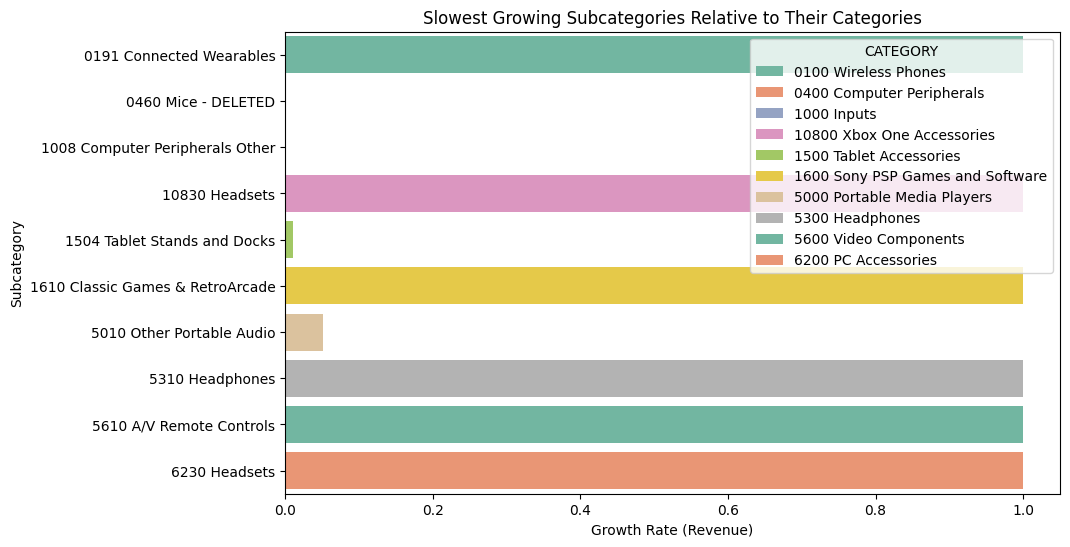

In [90]:
plt.figure(figsize=(10, 6))
sns.barplot(x='ORDERED_REVENUE', y='SUB_CATEGORY', hue='CATEGORY', data=slowest_subcategory, palette="Set2")
plt.title('Slowest Growing Subcategories Relative to Their Categories')
plt.xlabel('Growth Rate (Revenue)')
plt.ylabel('Subcategory')
plt.show()

**6. Highlight any anomalies/mismatches in the data.**

In [91]:
anomalous_skus = sales_data[(sales_data['ORDERED_UNITS'] > 0) & (sales_data['SKU_NAME'].isin(glance_views[glance_views['VIEWS'] == 0]['SKU_NAME']))]

# - Missing REP_OOS data
missing_oos_data = sales_data[sales_data['REP_OOS'].isna()]

print(f"\nSKUs with sales but no views: {anomalous_skus['SKU_NAME'].unique()}")
print(f"Missing REP_OOS data: {missing_oos_data.shape[0]} rows")


SKUs with sales but no views: []
Missing REP_OOS data: 689 rows


7. Unit Conversion (Units/Views) for SKU C120[H:8NV and its relationship with Average Selling Price.

In [92]:
sku_data = sales_data[sales_data['SKU_NAME'] == 'C120[H:8NV']
glance_views_sku = glance_views[glance_views['SKU_NAME'] == 'C120[H:8NV']

# Merge sales data and glance views to calculate conversion rate
merged_data = pd.merge(sku_data, glance_views_sku, on=['SKU_NAME', 'FEED_DATE'])
merged_data['CONVERSION_RATE'] = merged_data['UNITS'] / merged_data['VIEWS']

# Test correlation between conversion rate and average selling price
correlation = merged_data['CONVERSION_RATE'].corr(merged_data['PRICE_PER_UNIT'])

print(f"\nCorrelation between conversion rate and average selling price: {correlation}")


Correlation between conversion rate and average selling price: -0.029776602675128674


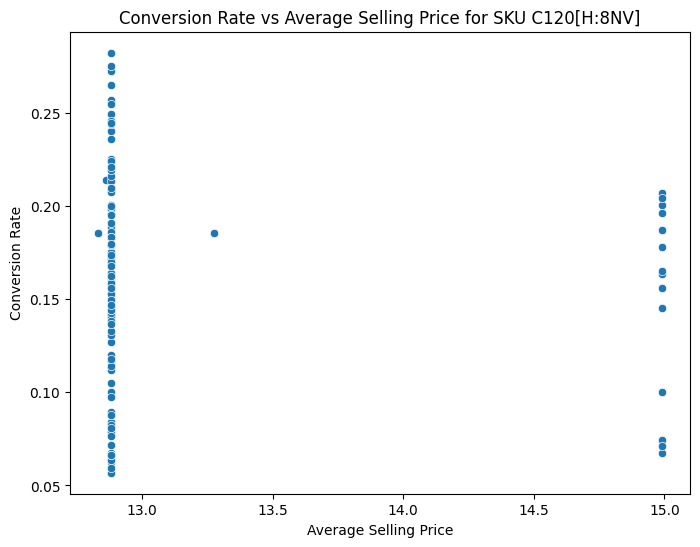

In [93]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PRICE_PER_UNIT', y='CONVERSION_RATE', data=merged_data)
plt.title('Conversion Rate vs Average Selling Price for SKU C120[H:8NV]')
plt.xlabel('Average Selling Price')
plt.ylabel('Conversion Rate')
plt.show()